<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [592]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [593]:
#ваш код здесь
df = pd.read_csv('data.csv', sep=';')
shape = df.shape
print(shape)

(44744, 12)


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [594]:
#ваш код здесь
print(df.head())

                                   Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...  

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [595]:
#ваш код здесь
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [596]:
#ваш код здесь
missing_columns = df.columns[df.isnull().sum() > 0]
print(missing_columns)

Index(['Опыт работы', 'Последнее/нынешнее место работы',
       'Последняя/нынешняя должность'],
      dtype='object')


5. Выведите основную статистическую информацию о столбцах.


In [597]:
#ваш код здесь
print(df.describe())

                                         Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
cou

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [598]:
#ваш код здесь
def extract_education_level(text):
    level = " ".join(text.split()[:2])  # Берём первые два слова
    if "Высшее образование" in level:
        return "высшее"
    elif "Неоконченное высшее" in level:
        return "неоконченное высшее"
    elif "Среднее специальное" in level:
        return "среднее специальное"
    elif "Среднее образование" in level:
        return "среднее"
    return None  # На случай, если уровень образования не распознан

# Создаём новый признак "Образование"
df["Образование"] = df["Образование и ВУЗ"].apply(extract_education_level)

# Проверяем уникальные категории
print("Уникальные категории в новом столбце:")
print(df["Образование"].unique())

# Удаляем старый столбец
df.drop(columns=["Образование и ВУЗ"], inplace=True)

# Вывод результата
print("\nПреобразованная таблица:")
print(df)
school_education_count = df[df["Образование"] == "среднее"].shape[0]
print(school_education_count)

Уникальные категории в новом столбце:
['неоконченное высшее' 'высшее' 'среднее специальное' 'среднее']

Преобразованная таблица:
                                       Пол, возраст           ЗП  \
0        Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1         Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2      Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3          Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4         Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   
...                                             ...          ...   
44739    Мужчина ,  30 лет , родился 17 января 1989   50000 руб.   
44740      Мужчина ,  27 лет , родился 5 марта 1992   39000 руб.   
44741  Женщина ,  48 лет , родилась 26 декабря 1970   40000 руб.   
44742   Мужчина ,  24 года , родился 6 октября 1994   20000 руб.   
44743    Мужчина ,  38 лет , родился 25 апреля 1980  120000 руб.   

                               Ищет работу на должност

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [599]:
#ваш код здесь
def extract_gender(text):
    # Разделяем строку по ', '
    parts = text.split(' , ')
    gender = parts[0]
    if gender == 'Мужчина':
        return 'М'
    elif gender == 'Женщина':
        return 'Ж'
    return None

# Функция для извлечения возраста
def extract_age(text):
    # Разделяем строку по ', ' и извлекаем возраст
    parts = text.split(' , ')
    age_str = parts[1]  # например, '39 лет' или '21 год'
    age = ''.join(filter(str.isdigit, age_str))  # Извлекаем только цифры
    return int(age)

# Создаём новые признаки
df["Пол"] = df["Пол, возраст"].apply(extract_gender)
df["Возраст"] = df["Пол, возраст"].apply(extract_age)

# Удаляем старый столбец
df.drop(columns=["Пол, возраст"], inplace=True)

# Выводим результат
print(df)

# Подсчитываем количество женских резюме
female_count = df[df["Пол"] == "Ж"].shape[0]

# Подсчитываем общее количество резюме
total_count = df.shape[0]

# Вычисляем процент женских резюме
female_percentage = (female_count / total_count) * 100

# Округляем до сотых
female_percentage_rounded = round(female_percentage, 2)

print(f"Процент женских резюме: {female_percentage_rounded}%")

# Рассчитываем средний возраст
average_age = df["Возраст"].mean()

# Округляем до десятых
average_age_rounded = round(average_age, 1)

print(f"Средний возраст соискателей: {average_age_rounded}")

                ЗП                          Ищет работу на должность:  \
0       29000 руб.                            Системный администратор   
1       40000 руб.                               Технический писатель   
2       20000 руб.                                           Оператор   
3      100000 руб.  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4      140000 руб.                  Региональный менеджер по продажам   
...            ...                                                ...   
44739   50000 руб.  Финансист, аналитик, экономист, бухгалтер, мен...   
44740   39000 руб.             Системный администратор, IT-специалист   
44741   40000 руб.                         Аналитик данных, Математик   
44742   20000 руб.                                   Контент-менеджер   
44743  120000 руб.                               Руководитель проекта   

                            Город, переезд, командировки  \
0      Советск (Калининградская область) , не готов к...   
1  

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [600]:
#ваш код здесь
import re
def extract_experience_months(text):
    if pd.isna(text) or "Не указано" in text:
        return np.nan

    years = 0
    months = 0
    years_str = ["год", "года", "лет"]
    months_str = ["месяцев", "месяц", "месяца"]
    text = text.split("  ")[0]
    text = text.split()
    for i, word in enumerate(text):
        if word in years_str:
            try:
                years = int(text[i - 1])
            except:
                pass
        elif word in months_str:
            try:
                months = int(text[i - 1])
            except:
                pass


    # Переводим все в месяцы
    total_months = years * 12 + months
    return total_months

# Создаём новый признак "Опыт работы (месяц)"
df["Опыт работы (месяц)"] = df["Опыт работы"].apply(extract_experience_months)

# Удаляем старый столбец
df.drop(columns=["Опыт работы"], inplace=True)

# Выводим результат
print(df)

print(df["Опыт работы (месяц)"].median())



                ЗП                          Ищет работу на должность:  \
0       29000 руб.                            Системный администратор   
1       40000 руб.                               Технический писатель   
2       20000 руб.                                           Оператор   
3      100000 руб.  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4      140000 руб.                  Региональный менеджер по продажам   
...            ...                                                ...   
44739   50000 руб.  Финансист, аналитик, экономист, бухгалтер, мен...   
44740   39000 руб.             Системный администратор, IT-специалист   
44741   40000 руб.                         Аналитик данных, Математик   
44742   20000 руб.                                   Контент-менеджер   
44743  120000 руб.                               Руководитель проекта   

                            Город, переезд, командировки  \
0      Советск (Калининградская область) , не готов к...   
1  

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [601]:
#ваш код здесь
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']

# Функция для извлечения города
def extract_city(text):
    city = text.split(' , ')[0]  # Город всегда в начале строки до первого разделителя
    if city == "Москва":
        return "Москва"
    elif city == "Санкт-Петербург":
        return "Санкт-Петербург"
    elif city in million_cities:
        return "город-миллионник"
    else:
        return "другие"

# Функция для извлечения информации о готовности к переезду
def extract_relocation(text):
    try:
        relocation_info = re.split(r'\s{1},\s{1}(?![^()]*\))', text)
        relocation_info = relocation_info[2] if len(relocation_info) == 4 else relocation_info[1]
    except:
        return False
    relocation_info = relocation_info.lower()
    
    if "не готов" in relocation_info or "не готовa" in relocation_info:
        return False
    elif "готов" in relocation_info or "готова" in relocation_info or "хочу" in relocation_info:
        return True
    return False

# Функция для извлечения информации о готовности к командировкам
def extract_business_trip(text):
    try:
        trip_info = re.split(r'\s{1},\s{1}(?![^()]*\))', text)
        trip_info = trip_info[3] if len(trip_info) == 4 else trip_info[2]
    except:
        # Если информации о командировках нет
        return False

    trip_info = trip_info.lower()
    
    if "не готов" in trip_info or "не готова" in trip_info:
        return False
    elif "готов" in trip_info or "готова" in trip_info:
        return True
    return False

# Применяем функции для преобразования данных
df["Город"] = df["Город, переезд, командировки"].apply(extract_city)
df["Готовность к переезду"] = df["Город, переезд, командировки"].apply(extract_relocation)
df["Готовность к командировкам"] = df["Город, переезд, командировки"].apply(extract_business_trip)

# Удаляем старый столбец
df.drop(columns=["Город, переезд, командировки"], inplace=True)

# Выводим результат
print(df)

# Подсчитываем количество соискателей, живущих в Санкт-Петербурге
count_spb = df[df["Город"] == "Санкт-Петербург"].shape[0]

# Подсчитываем общее количество соискателей
total_count = df.shape[0]

# Вычисляем процент
percentage_spb = (count_spb / total_count) * 100

# Округляем до целого числа
percentage_spb_rounded = round(percentage_spb)

# Выводим результат
print(percentage_spb_rounded)

# Фильтруем DataFrame, оставляем тех, кто готов и к переезду, и к командировкам
ready_to_relocate_and_travel = df[(df["Готовность к переезду"] == True) & (df["Готовность к командировкам"] == True)].shape[0]


# Подсчитываем общее количество соискателей
total_count = df.shape[0]

# Вычисляем процент
percentage_ready = (ready_to_relocate_and_travel / total_count) * 100

# Округляем до целого числа
percentage_ready_rounded = round(percentage_ready)

# Выводим результат
print(percentage_ready_rounded)

                ЗП                          Ищет работу на должность:  \
0       29000 руб.                            Системный администратор   
1       40000 руб.                               Технический писатель   
2       20000 руб.                                           Оператор   
3      100000 руб.  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4      140000 руб.                  Региональный менеджер по продажам   
...            ...                                                ...   
44739   50000 руб.  Финансист, аналитик, экономист, бухгалтер, мен...   
44740   39000 руб.             Системный администратор, IT-специалист   
44741   40000 руб.                         Аналитик данных, Математик   
44742   20000 руб.                                   Контент-менеджер   
44743  120000 руб.                               Руководитель проекта   

                                               Занятость  \
0      частичная занятость, проектная работа, полная ...   
1  

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [602]:
#ваш код здесь
def one_hot_encode(df, column, prefix):
    # Разделяем категории и создаём бинарные столбцы
    ohe = df[column].str.get_dummies(sep=', ').astype(bool)
    # Добавляем префикс к названиям новых столбцов
    ohe.columns = [f"{prefix}_{col}" for col in ohe.columns]
    # Присоединяем к основному DataFrame
    return pd.concat([df, ohe], axis=1)

# Применяем функцию к признакам "Занятость" и "График"
df = one_hot_encode(df, "Занятость", "Занятость")
df = one_hot_encode(df, "График", "График")

# Удаляем исходные столбцы "Занятость" и "График"
df.drop(["Занятость", "График"], axis=1, inplace=True)

# Вывод результата
print(df)
# Фильтруем строки, где "Занятость_проектная работа" и "Занятость_волонтерство" равны True
count = df[(df["Занятость_проектная работа"]) & (df["Занятость_волонтерство"])].shape[0]

print(f"Количество людей, которые ищут проектную работу и волонтёрство: {count}")
# Фильтруем строки, где "График_вахтовый метод" и "График_гибкий график" равны True
count = df[(df["График_вахтовый метод"]) & (df["График_гибкий график"])].shape[0]

print(f"Количество людей, которые хотят работать вахтовым методом и с гибким графиком: {count}")

                ЗП                          Ищет работу на должность:  \
0       29000 руб.                            Системный администратор   
1       40000 руб.                               Технический писатель   
2       20000 руб.                                           Оператор   
3      100000 руб.  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4      140000 руб.                  Региональный менеджер по продажам   
...            ...                                                ...   
44739   50000 руб.  Финансист, аналитик, экономист, бухгалтер, мен...   
44740   39000 руб.             Системный администратор, IT-специалист   
44741   40000 руб.                         Аналитик данных, Математик   
44742   20000 руб.                                   Контент-менеджер   
44743  120000 руб.                               Руководитель проекта   

                         Последнее/нынешнее место работы  \
0                                МАОУ "СОШ № 1 г.Немана"   
1  

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [603]:
#ваш код здесь
# Загружаем таблицу с курсами валют
df_rates = pd.read_csv('ExchangeRates.csv')  # Путь к файлу с курсами
# Преобразуем столбец "Обновление резюме" в формат datetime
df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме'], format='%d.%m.%Y %H:%M', dayfirst=True)
df['Обновление резюме'] = df['Обновление резюме'].dt.date


df_rates['date'] = pd.to_datetime(df_rates['date'], format='%d/%m/%y')



# Создадим словарь с курсами валют
currency_dict = {
    'грн.': 'UAH', 'USD': 'USD', 'EUR': 'EUR', 'бел.руб.': 'BYN', 'KGS': 'KGS', 'сум': 'UZS',
    'AZN': 'AZN', 'KZT': 'KZT'
}

# Функция для преобразования зарплаты в рубли
def convert_to_rub(salary, currency, date):
    if currency == 'руб.':
        return int(salary)
    
    # Преобразуем дату в нужный формат
    date = pd.to_datetime(date)

    # Найдем курс валюты на нужную дату
    rate = df_rates[(df_rates['currency'] == currency_dict[currency]) & (df_rates['date'] == date)]

    if not rate.empty:
        proportion = rate['proportion'].values[0]
        close = rate['close'].values[0]
        # Преобразуем в рубли
        salary_in_rub = int(salary) * close / proportion
        return salary_in_rub
    return np.nan

# Преобразуем все зарплаты в рубли
df['ЗП (руб)'] = df.apply(lambda row: convert_to_rub(row['ЗП'].split()[0], row['ЗП'].split()[1], row['Обновление резюме']), axis=1)
# Удалим исходный столбец "ЗП"
df.drop(columns=['ЗП'], inplace=True)

# Рассчитаем медиану по колонке "ЗП (руб)"
median_salary = df['ЗП (руб)'].median()

# Выводим медианную заработную плату, округленную до тысяч
median_salary_thousands = round(median_salary / 1000)
print(f"Медианная заработная плата: {median_salary} тыс. руб.")

Медианная заработная плата: 59019.0 тыс. руб.


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

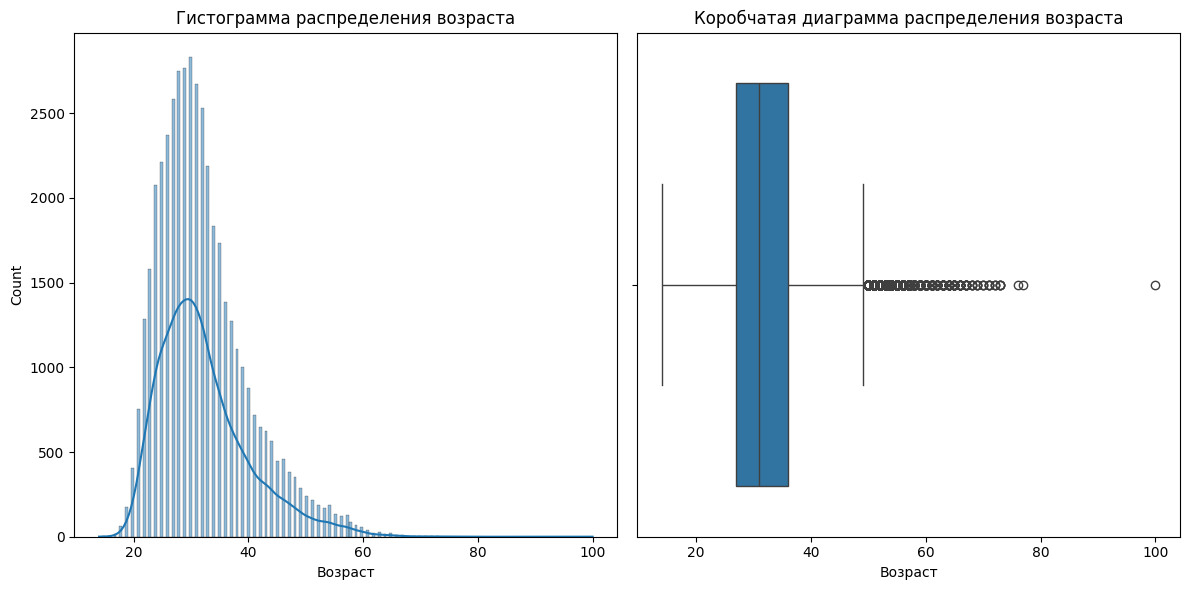

Модальное значение возраста: 30


In [604]:
# ваш код здесь
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Гистограмма
sns.histplot(df['Возраст'], kde=True, ax=axes[0])
axes[0].set_title('Гистограмма распределения возраста')

# Коробчатая диаграмма
sns.boxplot(x=df['Возраст'], ax=axes[1])
axes[1].set_title('Коробчатая диаграмма распределения возраста')

plt.tight_layout()
plt.show()
# Вычисление моды
mode_age = df['Возраст'].mode()[0]
print(f"Модальное значение возраста: {mode_age}")

ваши выводы по графику здесь

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

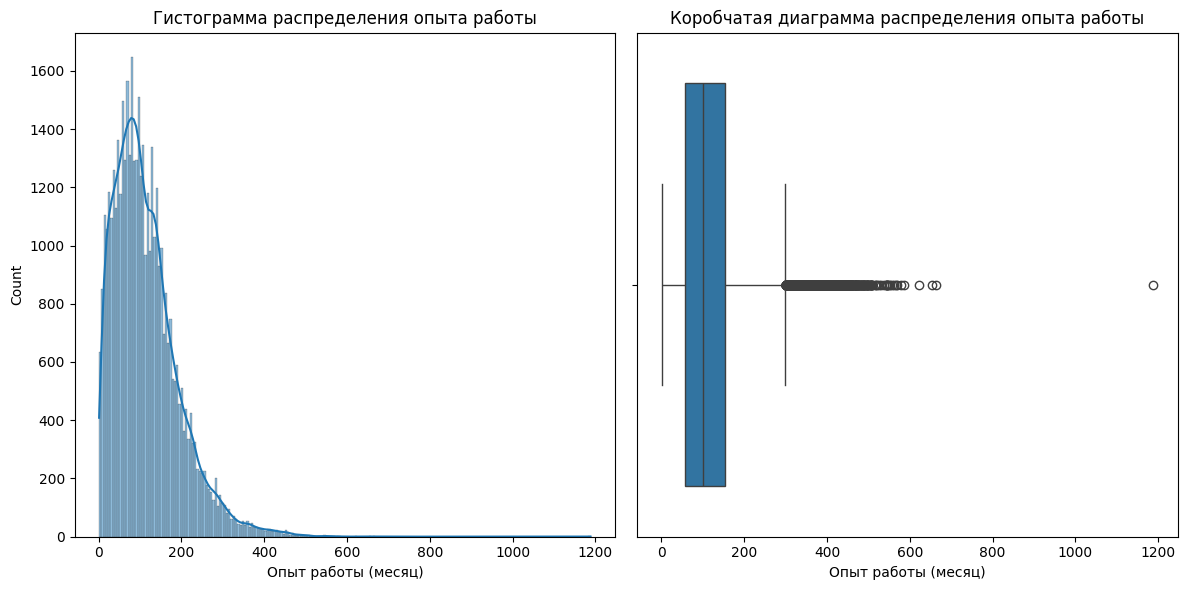

1188.0


In [605]:
# ваш код здесь
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Гистограмма
sns.histplot(df['Опыт работы (месяц)'], kde=True, ax=axes[0])
axes[0].set_title('Гистограмма распределения опыта работы')

# Коробчатая диаграмма
sns.boxplot(x=df['Опыт работы (месяц)'], ax=axes[1])
axes[1].set_title('Коробчатая диаграмма распределения опыта работы')

plt.tight_layout()
plt.show()
print(df["Опыт работы (месяц)"].max())

ваши выводы здесь

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


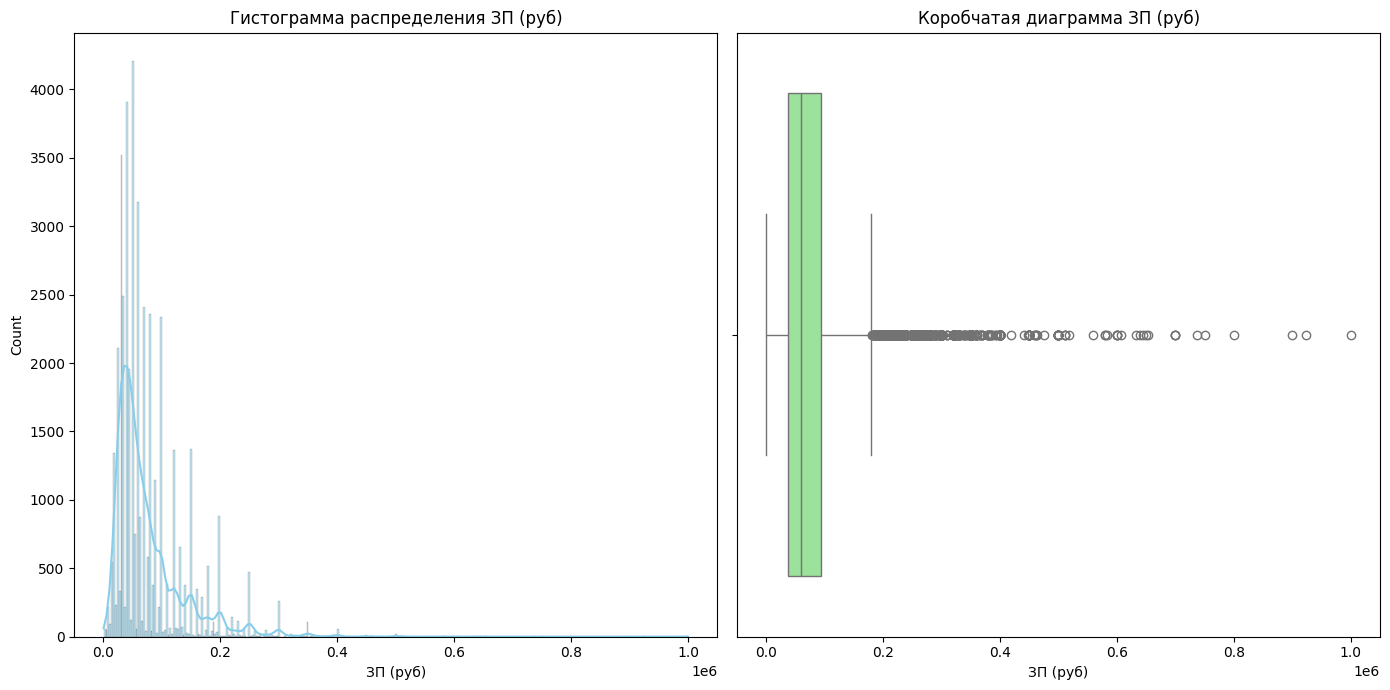

Количество соискателей с зарплатой выше 1 миллиона рублей: 0


In [619]:
# ваш код здесь

# Строим гистограмму и коробчатую диаграмму рядом
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Гистограмма
sns.histplot(df['ЗП (руб)'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Гистограмма распределения ЗП (руб)')

# Коробчатая диаграмма
sns.boxplot(x=df['ЗП (руб)'], ax=axes[1], color='lightgreen')
axes[1].set_title('Коробчатая диаграмма ЗП (руб)')

plt.tight_layout()
plt.show()
# Фильтруем данные
above_million = df[df['ЗП (руб)'] > 1000000]

# Считаем количество таких соискателей
count_above_million = above_million.shape[0]

print(f"Количество соискателей с зарплатой выше 1 миллиона рублей: {count_above_million}")

ваши выводы здесь

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

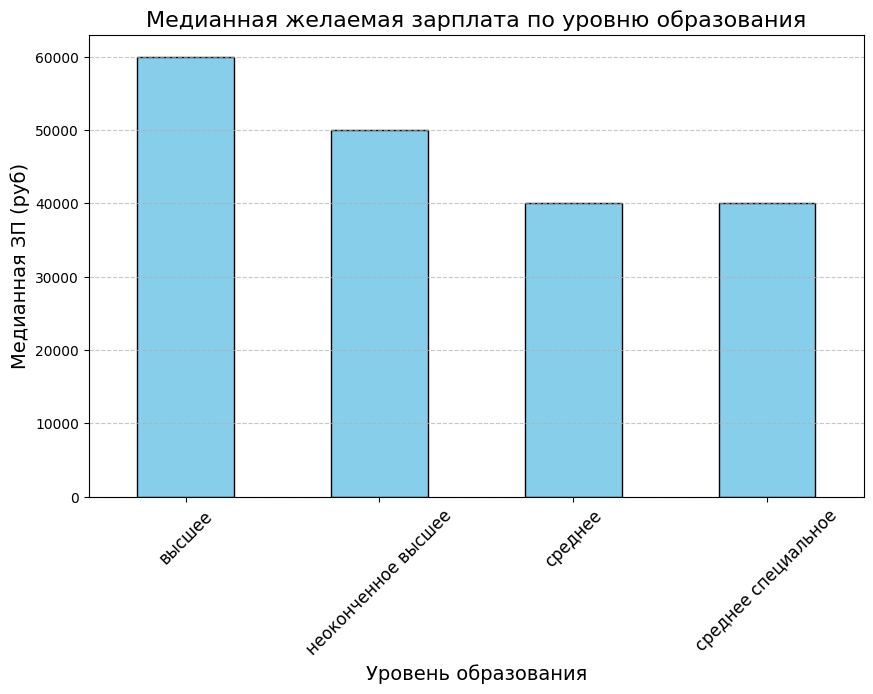

Категория образования с самой высокой медианной зарплатой: высшее (60000.0 рублей)


In [607]:
# ваш код здесь
# Группировка и вычисление медианной зарплаты

# Фильтрация данных: оставляем зарплаты меньше 1 млн рублей
filtered_df = df[df['ЗП (руб)'] < 1000000]
median_salary_by_education = (
    filtered_df.groupby('Образование')['ЗП (руб)']
    .median()
    .sort_values(ascending=False)  # Сортируем для удобства отображения
)

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
median_salary_by_education.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Медианная желаемая зарплата по уровню образования', fontsize=16)
plt.xlabel('Уровень образования', fontsize=14)
plt.ylabel('Медианная ЗП (руб)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# Группировка по образованию и вычисление медианы зарплаты
median_salary_by_education = df.groupby('Образование')['ЗП (руб)'].median()

# Определение категории с максимальной медианной зарплатой
max_median_education = median_salary_by_education.idxmax()
max_median_value = median_salary_by_education.max()

print(f"Категория образования с самой высокой медианной зарплатой: {max_median_education} ({max_median_value} рублей)")

ваши выводы здесь

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

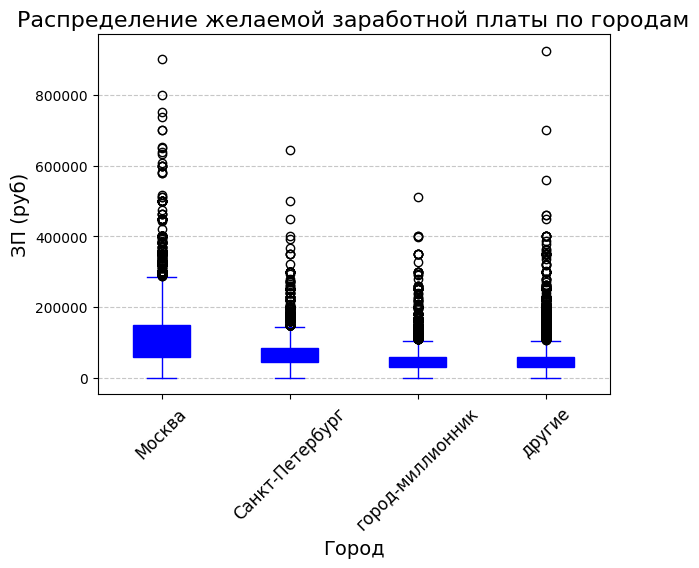

Город с наибольшей зарплатой: другие
Значение зарплаты: 24304876.0 рублей


In [608]:
# ваш код здесь
# Построение boxplot


# Построение boxplot с группировкой по городам
filtered_df.boxplot(column='ЗП (руб)', by='Город', grid=False, color='blue', patch_artist=True)

plt.title('Распределение желаемой заработной платы по городам', fontsize=16)
plt.suptitle("")  # Убираем автоматический заголовок от pandas
plt.xlabel('Город', fontsize=14)
plt.ylabel('ЗП (руб)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# Поиск записи с желаемой зарплатой около 924 тыс. рублей
city_with_max_salary = df.loc[df['ЗП (руб)'].idxmax()]

print(f"Город с наибольшей зарплатой: {city_with_max_salary['Город']}")
print(f"Значение зарплаты: {city_with_max_salary['ЗП (руб)']} рублей")

ваши выводы здесь

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

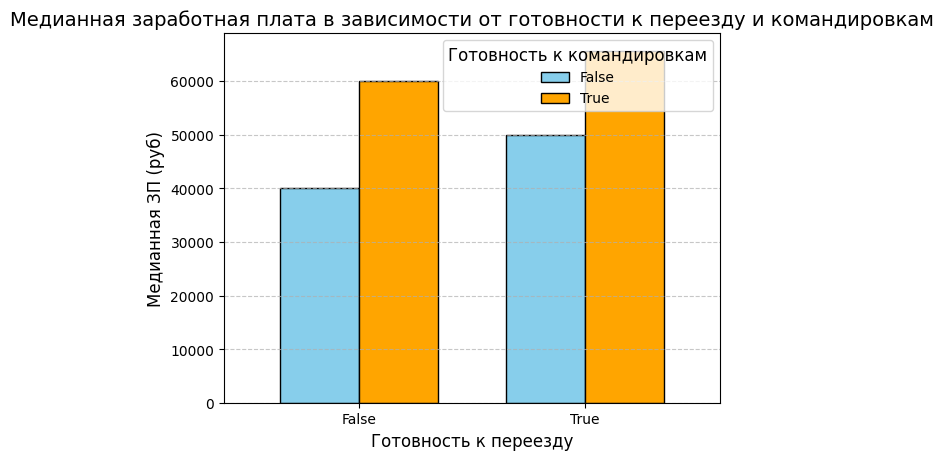

Медианная заработная плата: 65900.0 рублей


In [609]:
# ваш код здесь
# Группировка данных и расчет медианной зарплаты
grouped = (
    df[df['ЗП (руб)'] < 1000000]  # Фильтрация по зарплате < 1 млн
    .groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)']
    .median()
    .unstack()  # Преобразование в таблицу для удобного построения графика
)


grouped.plot(kind='bar', stacked=False, color=['skyblue', 'orange'], edgecolor='black', width=0.7)

# Настройка графика
plt.title('Медианная заработная плата в зависимости от готовности к переезду и командировкам', fontsize=14)
plt.xlabel('Готовность к переезду', fontsize=12)
plt.ylabel('Медианная ЗП (руб)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title='Готовность к командировкам', fontsize=10, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# Фильтрация данных: соискатели, готовые и к переезду, и к командировкам
median_salary = df[
    (df['Готовность к переезду'] == True) & 
    (df['Готовность к командировкам'] == True)
]['ЗП (руб)'].median()

print(f"Медианная заработная плата: {median_salary} рублей")

ваши выводы здесь

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

/var/folders/qx/tc60_yx925v4tbgs67bq5w7m0000gn/T/ipykernel_89581/3403451783.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='ЗП (руб)',


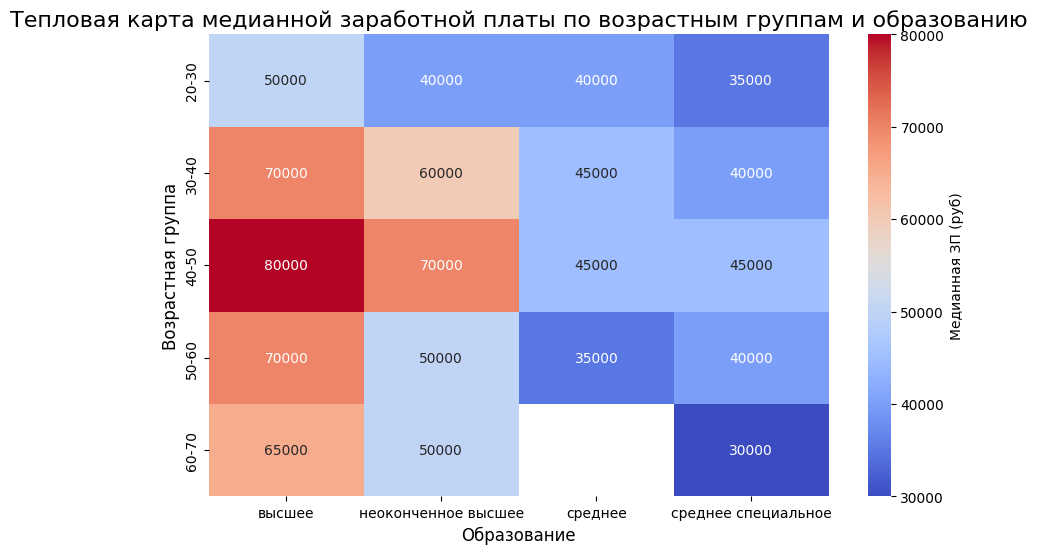

In [610]:
# ваш код здесь
# Определение возрастных групп
bins = [20, 30, 40, 50, 60, 70]  # Примерные возрастные группы
labels = ['20-30', '30-40', '40-50', '50-60', '60-70']  # Метки для групп

# Присваиваем возрастные группы
df['Возрастная группа'] = pd.cut(df['Возраст'], bins=bins, labels=labels, right=False)

# Создание сводной таблицы
pivot_table = df.pivot_table(values='ЗП (руб)', 
                             index='Возрастная группа', 
                             columns='Образование', 
                             aggfunc='median')

# Построение тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.0f', cbar_kws={'label': 'Медианная ЗП (руб)'})
plt.title('Тепловая карта медианной заработной платы по возрастным группам и образованию', fontsize=16)
plt.xlabel('Образование', fontsize=12)
plt.ylabel('Возрастная группа', fontsize=12)
plt.show()


ваши выводы здесь

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

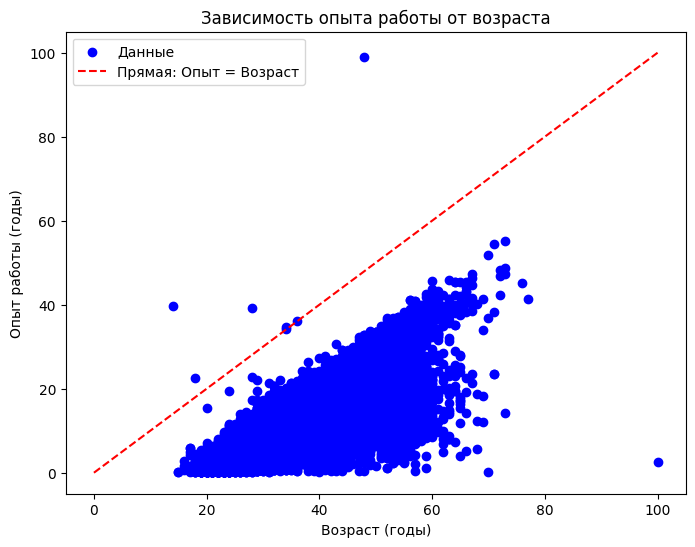

             Ищет работу на должность:  \
4535            Технический специалист   
19351  Специалист (Junior-программист)   
19872                         Аналитик   
26477             Менеджер IT-проектов   
29098      Ведущий инженер-программист   
40015  Системный администратор Windows   
43451   Руководитель отдела разработки   

                         Последнее/нынешнее место работы  \
4535                                                   а   
19351                                  Русский свет, ООО   
19872                                           Kyivstar   
26477  М©й IT'M  ("Информационные Технологии' Менеджм...   
29098                           КБ Аметист, Концерн АГАТ   
40015                                     АО ТК Горизонт   
43451                                              ЛАНИТ   

                     Последняя/нынешняя должность Обновление резюме  \
4535                                            а        2019-04-11   
19351                                   

In [611]:
# ваш код здесь
# Перевод опыта работы в годы
df["Опыт работы (годы)"] = df["Опыт работы (месяц)"] / 12

# Построение диаграммы рассеяния
plt.figure(figsize=(8, 6))
plt.scatter(df["Возраст"], df["Опыт работы (годы)"], color="blue", label="Данные")

# Добавление прямой (где опыт = возраст)
x_vals = np.linspace(0, 100, 100)
y_vals = x_vals  # Прямая y = x
plt.plot(x_vals, y_vals, color="red", linestyle="--", label="Прямая: Опыт = Возраст")

# Добавление подписей и заголовка
plt.title("Зависимость опыта работы от возраста")
plt.xlabel("Возраст (годы)")
plt.ylabel("Опыт работы (годы)")

# Показываем легенду
plt.legend()

# Отображаем график
plt.show()


# Перевод опыта работы в годы
df["Опыт работы (годы)"] = df["Опыт работы (месяц)"] / 12

# Фильтрация точек, где опыт работы больше возраста
above_line = df[df["Опыт работы (годы)"] > df["Возраст"]]

# Выводим отфильтрованные данные
print(above_line)

# Количество таких точек
num_above_line = above_line.shape[0]
print(f"Количество точек выше прямой: {num_above_line}")

ваши выводы здесь

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


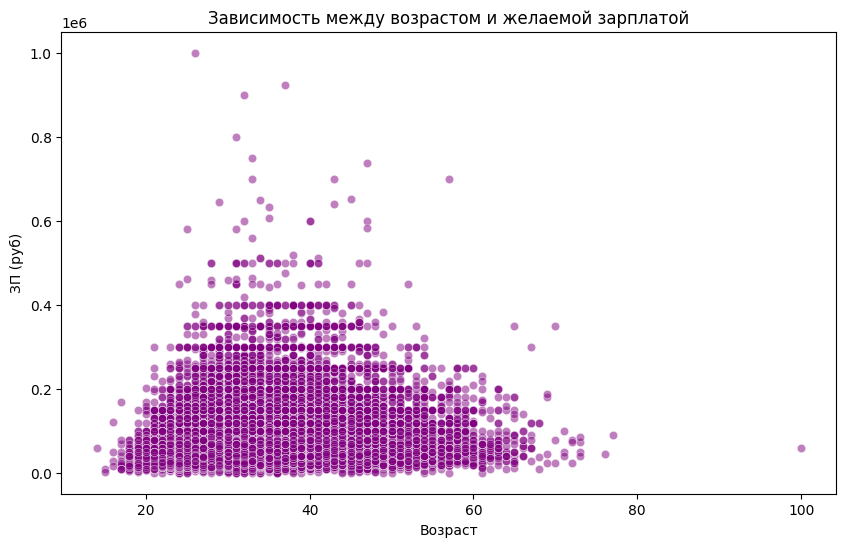

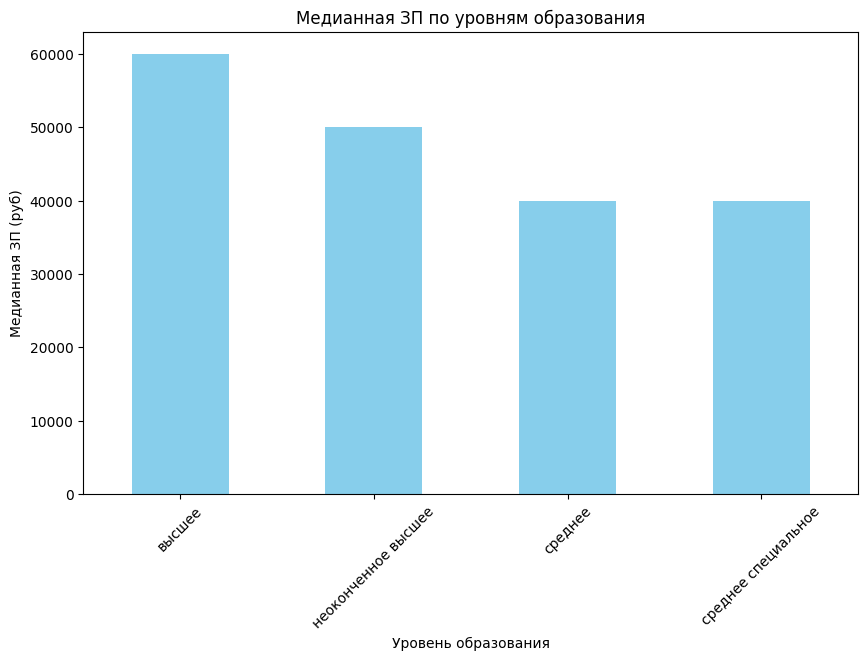

In [625]:
# ваш код здесь


# Строим график зависимости ЗП от возраста
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Возраст'], y=df['ЗП (руб)'], color='purple', alpha=0.5)
plt.title('Зависимость между возрастом и желаемой зарплатой')
plt.xlabel('Возраст')
plt.ylabel('ЗП (руб)')
plt.show()


# Группируем данные по уровню образования и рассчитываем среднее значение ЗП
education_salary = df.groupby('Образование')['ЗП (руб)'].median().sort_values(ascending=False)

# Строим столбчатую диаграмму
plt.figure(figsize=(10, 6))
education_salary.plot(kind='bar', color='skyblue')
plt.title('Медианная ЗП по уровням образования')
plt.xlabel('Уровень образования')
plt.ylabel('Медианная ЗП (руб)')
plt.xticks(rotation=45)
plt.show()


ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [613]:
# ваш код здесь
# Проверяем дубликаты
print("Дубликаты до удаления:")
print(df[df.duplicated()])

# Удаляем полные дубликаты
df.drop_duplicates(inplace=True)




Дубликаты до удаления:
                               Ищет работу на должность:  \
380    системный администратор, информационная безопа...   
543                                             Аналитик   
876                              Системный администратор   
1038                             Главный инженер проекта   
1116   Руководитель отдела программирования станков с...   
...                                                  ...   
37481                                    Веб разработчик   
37841                                  менеджер проектов   
37932                         Специалист по тестированию   
40081                                     Data Scientist   
41997                                        Программист   

                         Последнее/нынешнее место работы  \
380                                    ООО "Техкомплект"   
543    Федеральная служба по регулированию алкогольно...   
876                            ЗАО БАНК РУССКИЙ СТАНДАРТ   
1038            

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [614]:
# ваш код здесь
# Выводим количество пропусков в каждом столбце
print("Число пропусков в столбцах:")
print(df.isna().sum())

Число пропусков в столбцах:
Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                170
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
Занятость_волонтерство               0
Занятость_полная занятость           0
Занятость_проектная работа           0
Занятость_стажировка                 0
Занятость_частичная занятость        0
График_вахтовый метод                0
График_гибкий график                 0
График_полный день                   0
График_сменный график                0
График_удаленная работа              0
ЗП (руб)                             0
Возрастная группа                  269
Опыт работы (годы)                 1

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [615]:
# ваш код здесь

# Шаг 1: Удаляем строки с пропусками в столбцах "Последнее/нынешнее место работы" и "Последняя/нынешняя должность"
df_cleaned = df.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

# Шаг 2: Заполняем пропуски в столбце "Опыт работы (месяц)" медианным значением
median_experience = df_cleaned['Опыт работы (месяц)'].median()
df_cleaned['Опыт работы (месяц)'].fillna(median_experience, inplace=True)

# Выводим результат
print(df_cleaned)
# Результирующее среднее значение в столбце "Опыт работы (месяц)"
mean_experience = df_cleaned['Опыт работы (месяц)'].mean()

# Округляем до целых
print(round(mean_experience))

                               Ищет работу на должность:  \
0                                Системный администратор   
1                                   Технический писатель   
2                                               Оператор   
3      Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                      Региональный менеджер по продажам   
...                                                  ...   
44739  Финансист, аналитик, экономист, бухгалтер, мен...   
44740             Системный администратор, IT-специалист   
44741                         Аналитик данных, Математик   
44742                                   Контент-менеджер   
44743                               Руководитель проекта   

                         Последнее/нынешнее место работы  \
0                                МАОУ "СОШ № 1 г.Немана"   
1                           Временный трудовой коллектив   
2                                           ПАО Сбербанк   
3                                      

/var/folders/qx/tc60_yx925v4tbgs67bq5w7m0000gn/T/ipykernel_89581/2462356442.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Опыт работы (месяц)'].fillna(median_experience, inplace=True)
/var/folders/qx/tc60_yx925v4tbgs67bq5w7m0000gn/T/ipykernel_89581/2462356442.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Опы

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [616]:
# ваш код здесь

# Найдем выбросы (ЗП < 1000 или ЗП > 1 млн)
outliers = df[(df['ЗП (руб)'] < 1000) | (df['ЗП (руб)'] > 1000000)]

# Выведем количество выбросов
print(f"Количество выбросов: {outliers.shape[0]}")

df = df[(df['ЗП (руб)'] >= 1000) & (df['ЗП (руб)'] <= 1000000)]


Количество выбросов: 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [617]:
# ваш код здесь
df['Опыт работы (годы)'] = df['Опыт работы (месяц)'] / 12

# Найдем строки, где опыт работы в годах превышает возраст
outliers = df[df['Опыт работы (годы)'] > df['Возраст']]

# Удаляем строки с выбросами
df_cleaned = df[df['Опыт работы (годы)'] <= df['Возраст']]

# Выводим количество выбросов
num_outliers = outliers.shape[0]
print(f"Количество выбросов: {num_outliers}")



Количество выбросов: 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

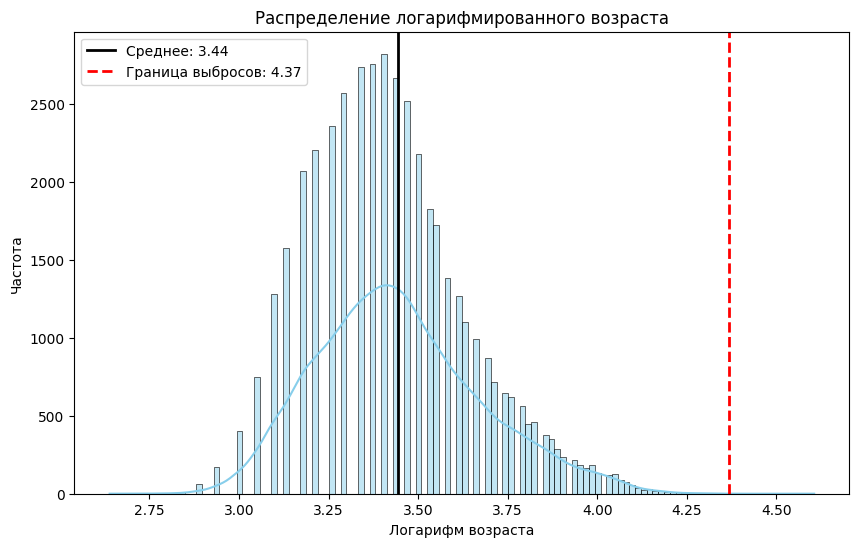

,Пол,Возраст,log_возраст,z_score_log_возраст
33654,М,100,4.60517,5.026389


In [618]:
# ваш код здесь
from scipy.stats import zscore
# Преобразуем возраст в логарифмическую шкалу
df['log_возраст'] = np.log(df['Возраст'])

# Строим гистограмму для логарифмированного возраста
plt.figure(figsize=(10, 6))
histplot = sns.histplot(df['log_возраст'], kde=True, color='skyblue')

# Добавляем линию среднего
mean_log_age = df['log_возраст'].mean()
histplot.axvline(mean_log_age, color='k', lw=2, label=f'Среднее: {mean_log_age:.2f}')

# Добавляем линии для 4 сигм в правую сторону (для поиска выбросов)
std_log_age = df['log_возраст'].std()
lower_limit = mean_log_age - 4 * std_log_age
upper_limit = mean_log_age + 4 * std_log_age
histplot.axvline(upper_limit, color='r', linestyle='--', lw=2, label=f'Граница выбросов: {upper_limit:.2f}')

# Подписи на графике
plt.title('Распределение логарифмированного возраста')
plt.xlabel('Логарифм возраста')
plt.ylabel('Частота')
plt.legend()

# Показываем график
plt.show()

# Выводим выбросы на основе Z-отклонения с послаблением в 4 сигмы для правой стороны
df['z_score_log_возраст'] = zscore(df['log_возраст'])
outliers = df[df['z_score_log_возраст'] > 4]

# Покажем таблицу с выбросами
outliers[['Пол', 'Возраст', 'log_возраст', 'z_score_log_возраст']]


ваш коммментарий здесь